In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
breast_cancer = load_breast_cancer()

In [21]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=["label"])

In [22]:
y.value_counts()

label
1        357
0        212
Name: count, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from keras import Sequential

In [39]:
model = Sequential([
    keras.layers.Normalization(),
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [61]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9560
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 0.9451
Epoch 3/10
12/12 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0816 - val_accuracy: 0.9451
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0695 - val_accuracy: 0.9451
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9945 - val_loss: 0.0640 - val_accuracy: 0.9560
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9560
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9560
Epoch 8/10
12/12 [=

In [70]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.9649


[0.17615550756454468, 0.9649122953414917]

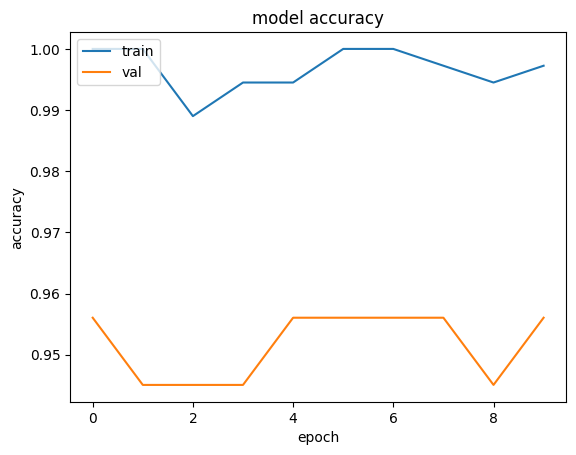

In [64]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

Predictive System

In [75]:
input_data=()

input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

predication_label = np.argmax(prediction)
print(predication_label)

if predication_label == 0:
  print("The tumor is Malignant")
else:
  print("The tumor is Benign")

1/1 [==============================] - 0s 24ms/step
[[2.412027e-05 9.970202e-01]]
1
The tumor is Benign
